In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm
import matplotlib.gridspec as grid
import statsmodels.api as sm
from matplotlib.colors import LogNorm

In [2]:
# set the path
path = '/Users/qpasa/Desktop/GC_chemistry'
folder = '/data/'
file = 'GC_final_Baumgardt_selection_nopms_1stpop' #merged tables from DR12 and DR14 using APOGEE ID

# read in the merged data table
tb = fits.open(path+folder+file)
# select the data
data = tb[1].data #extracts the numeric bit of the data

# read in the data
fe_h = data.field('FE_H')
mg_fe = data.field('MG_FE')
al_fe = data.field('AL_FE')
k_fe = data.field('K_FE')
ni_fe = data.field('NI_FE')
o_fe = data.field('O_FE')
si_fe = data.field('SI_FE')
v_fe = data.field('V_FE')
c_fe = data.field('C_FE')
s_fe = data.field('S_FE')
n_fe = data.field('N_FE')
mn_fe = data.field('MN_FE')
co_fe = data.field('CO_FE')
p_fe = data.field('P_FE')
ti_fe = data.field('TI_FE')
cu_fe = data.field('CU_FE')
ce_fe = data.field('CE_FE')
ci_fe = data.field('CI_FE')
cr_fe = data.field('CR_FE')
ca_fe = data.field('CA_FE')
na_fe = data.field('NA_FE')
Teff = data.field('TEFF')
logg = data.field('LOGG')
gc_name = data.field('gc_name')
glat = data.field('GLAT') #galactic latitude (a.k.a |b|)
glon = data.field('GLON') #galactic longitude (a.k.a l)


In [3]:
# set the path
path = '/Users/qpasa/Desktop/PhD/Data/APOGEE'
folder = '/DR16/'
file = 'dr16+astroNN_complete' #merged tables from DR12 and DR14 using APOGEE ID

# read in the merged data2 table
tb2 = fits.open(path+folder+file)
# select the data2
data2 = tb2[1].data #extracts the numeric bit of the data2

# read in the data2
fe_h2 = data2.field('FE_H_1')
si_fe2 = data2.field('SI_FE_1')
Teff2 = data2.field('TEFF_1')
logg2 = data2.field('LOGG_1')
glat2 = data2.field('GLAT_1') #galactic latitude (a.k.a |b|)
glon2 = data2.field('GLON_1') #galactic longitude (a.k.a l)
dist2 = data2.field('weighted_dist') #galactic longitude (a.k.a l)
E2 = data2.field('E')
Lz2 = data2.field('Lz')

In [4]:
mask_disc = (E2<-8000)&(fe_h2>-10)&(si_fe2>-10)&(Teff2<6000)&(Teff2>4000)&(logg2<3.6)&(Lz2>0.5)&(logg2>2.)
mask_halo = (E2>-7500)&(Lz2<0.5)&(Lz2>-1)&(fe_h2>-10)&(si_fe2>-10)&(Teff2<6000)&(Teff2>4000)&(logg2<3.6)
mask_highe = (E2>50000)&(Lz2<0)&(E2<100000)
feh_disc = fe_h2[mask_disc]
sife_disc = si_fe2[mask_disc]
print(np.shape(feh_disc))
feh_halo = fe_h2[mask_halo]
sife_halo = si_fe2[mask_halo]
print(np.shape(feh_halo))
feh_highe = fe_h2[mask_highe]
sife_highe = si_fe2[mask_highe]
print(np.shape(sife_highe))

# xpoly_disc,ypoly_disc, coeffs_disc,poly_disc = fit_func(feh_disc,sife_disc,5)

# xpoly_halo,ypoly_halo, coeffs_halo,poly_halo = fit_func(feh_halo,sife_halo,3)



KeyboardInterrupt: 

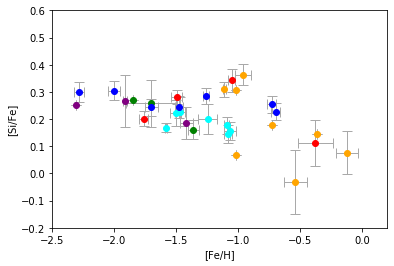

In [7]:
mask1 = (fe_h>-10)&(si_fe>-10)#&(Teff<=4750)
fe_h1 = fe_h[mask1]
si_fe1 = si_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')])]
#      np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(si_fe1[np.where(gc_name1=='NGC6809')]),np.mean(si_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6121')]),np.mean(si_fe1[np.where(gc_name1=='NGC6441')])]
#      np.mean(si_fe1[np.where(gc_name1=='NGC6544')]),np.mean(si_fe1[np.where(gc_name1=='Pal6')]),\
#      np.mean(si_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')])]
#         np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
#         np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(si_fe1[np.where(gc_name1=='NGC6809')]),np.std(si_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(si_fe1[np.where(gc_name1=='NGC6121')]),np.std(si_fe1[np.where(gc_name1=='NGC6441')])]
#         np.std(si_fe1[np.where(gc_name1=='NGC6544')]),np.std(si_fe1[np.where(gc_name1=='Pal6')]),\
#         np.std(si_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(si_fe1[np.where(gc_name1=='NGC362')]),np.mean(si_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC1904')]),np.mean(si_fe1[np.where(gc_name1=='NGC2808')]),\
#      np.mean(si_fe1[np.where(gc_name1=='NGC4147')]),np.mean(si_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6341')]),np.mean(si_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(si_fe1[np.where(gc_name1=='NGC6205')]),np.mean(si_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
#         np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(si_fe1[np.where(gc_name1=='NGC362')]),np.std(si_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(si_fe1[np.where(gc_name1=='NGC1904')]),np.std(si_fe1[np.where(gc_name1=='NGC2808')]),\
#     np.std(si_fe1[np.where(gc_name1=='NGC4147')]),np.std(si_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(si_fe1[np.where(gc_name1=='NGC6341')]),np.std(si_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(si_fe1[np.where(gc_name1=='NGC6205')]),np.std(si_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(si_fe1[np.where(gc_name1=='NGC5466')]),np.mean(si_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(si_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(si_fe1[np.where(gc_name1=='NGC5466')]),np.std(si_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(si_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')])]
#     np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\ np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),
#         np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(si_fe1[np.where(gc_name1=='NGC104')]),np.mean(si_fe1[np.where(gc_name1=='NGC6397')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6218')]),np.mean(si_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6656')]),np.mean(si_fe1[np.where(gc_name1=='NGC6752')])]
#      np.mean(si_fe1[np.where(gc_name1=='Pal10')]),np.mean(si_fe1[np.where(gc_name1=='IC1276')]),\np.mean(si_fe1[np.where(gc_name1=='NGC6352')]),
#         np.mean(si_fe1[np.where(gc_name1=='NGC6760')]),np.mean(si_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')])]
#         np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\np.std(fe_h1[np.where(gc_name1=='NGC6352')]),
#            np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(si_fe1[np.where(gc_name1=='NGC104')]),np.std(si_fe1[np.where(gc_name1=='NGC6397')]),\
     np.std(si_fe1[np.where(gc_name1=='NGC6218')]),np.std(si_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(si_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(si_fe1[np.where(gc_name1=='NGC6656')]),np.std(si_fe1[np.where(gc_name1=='NGC6752')])]
#         np.std(si_fe1[np.where(gc_name1=='Pal10')]),np.std(si_fe1[np.where(gc_name1=='IC1276')]),\np.std(si_fe1[np.where(gc_name1=='NGC6352')]),
#            np.std(si_fe1[np.where(gc_name1=='NGC6760')]),np.std(si_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
#     np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(si_fe1[np.where(gc_name1=='NGC6522')]),np.mean(si_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(si_fe1[np.where(gc_name1=='HP1')]),np.mean(si_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6388')]),np.mean(si_fe1[np.where(gc_name1=='Terzan9')]),\
#      np.mean(si_fe1[np.where(gc_name1=='Terzan4')]),np.mean(si_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(si_fe1[np.where(gc_name1=='NGC6723')]),np.mean(si_fe1[np.where(gc_name1=='NGC6539')]),\
        np.mean(si_fe1[np.where(gc_name1=='NGC6540')]),np.mean(si_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
#         np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(si_fe1[np.where(gc_name1=='NGC6522')]),np.std(si_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(si_fe1[np.where(gc_name1=='HP1')]),np.std(si_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(si_fe1[np.where(gc_name1=='NGC6388')]),np.std(si_fe1[np.where(gc_name1=='Terzan9')]),\
#         np.std(si_fe1[np.where(gc_name1=='Terzan4')]),np.std(si_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(si_fe1[np.where(gc_name1=='NGC6723')]),np.std(si_fe1[np.where(gc_name1=='NGC6539')]),\
           np.std(si_fe1[np.where(gc_name1=='NGC6540')]),np.std(si_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(si_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(si_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(si_fe1[np.where(gc_name1=='NGC5024')]),np.mean(si_fe1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(si_fe1[np.where(gc_name1=='NGC4590')]),np.mean(si_fe1[np.where(gc_name1=='Rup106')]),\
        np.mean(si_fe1[np.where(gc_name1=='NGC4590')]),\
       np.mean(si_fe1[np.where(gc_name1=='NGC5272')]),np.mean(si_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
#           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(si_fe1[np.where(gc_name1=='NGC5024')]),np.std(si_fe1[np.where(gc_name1=='NGC5053')]),\
#           np.std(si_fe1[np.where(gc_name1=='NGC4590')]),np.std(si_fe1[np.where(gc_name1=='Rup106')]),\
           np.std(si_fe1[np.where(gc_name1=='NGC4590')]),\
          np.std(si_fe1[np.where(gc_name1=='NGC5272')]),np.std(si_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(si_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(si_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(si_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(si_fe1[np.where(gc_name1=='Liller1')])]

# UKS1
xs_uk = [np.mean(fe_h1[np.where(gc_name1=='UKS1')])]
ys_uk = [np.mean(si_fe1[np.where(gc_name1=='UKS1')])]
xerrs_uk = [np.std(fe_h1[np.where(gc_name1=='UKS1')])]
yerrs_uk = [np.std(si_fe1[np.where(gc_name1=='UKS1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='GE GCs')
# plt.plot(xpoly_ge,ypoly_ge,'-',c='cyan')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='L-E GCs')
# # plt.plot(xpoly_le,ypoly_le,'r-')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='darkgrey', elinewidth=1, capsize=5,
             label='MD GCs')
# plt.plot(xpoly_md,ypoly_md,'b-')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='darkgrey', elinewidth=1, capsize=5,
             label='MB GCs')
# plt.plot(xpoly_mb,ypoly_mb,'-',c='orange')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='darkgrey', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
# plt.plot(xpoly_hel,ypoly_hel,'-',c='purple')
# plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='NGC5904')
# plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Liller1')
# plt.errorbar(xs_uk,ys_uk,xerr = xerrs_uk,yerr= yerrs_uk,fmt='o', color='magenta',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='UKS1')
plt.ylabel('[Si/Fe]')
plt.xlabel('[Fe/H]')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper right')
plt.xlim(-2.5,0.2)
plt.ylim(-.2,.6)
plt.show()

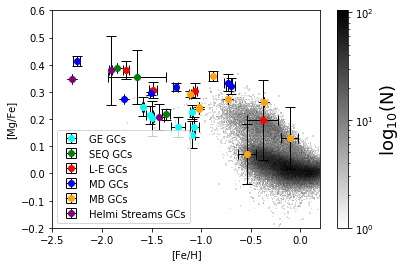

In [24]:
mask1 = (fe_h>-10)&(mg_fe>-10)&(Teff<=4750)
fe_h1 = fe_h[mask1]
mg_fe1 = mg_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')])]
#      np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(mg_fe1[np.where(gc_name1=='NGC6809')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6121')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6441')])]
#      np.mean(mg_fe1[np.where(gc_name1=='NGC6544')]),np.mean(mg_fe1[np.where(gc_name1=='Pal6')]),\
#      np.mean(mg_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')])]
#         np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')]),\
#         np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(mg_fe1[np.where(gc_name1=='NGC6809')]),np.std(mg_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(mg_fe1[np.where(gc_name1=='NGC6121')]),np.std(mg_fe1[np.where(gc_name1=='NGC6441')])]
#         np.std(mg_fe1[np.where(gc_name1=='NGC6544')]),np.std(mg_fe1[np.where(gc_name1=='Pal6')]),\
#         np.std(mg_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
#     np.mean(fe_h1[np.where(gc_name1=='NGC4147')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]
ys_ge = [np.mean(mg_fe1[np.where(gc_name1=='NGC362')]),np.mean(mg_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC1904')]),np.mean(mg_fe1[np.where(gc_name1=='NGC2808')]),\
#      np.mean(mg_fe1[np.where(gc_name1=='NGC4147')]),np.mean(mg_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6341')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(mg_fe1[np.where(gc_name1=='NGC6205')]),np.mean(mg_fe1[np.where(gc_name1=='NGC7089')])]
xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
#         np.std(fe_h1[np.where(gc_name1=='NGC4147')]),np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]
yerrs_ge = [np.std(mg_fe1[np.where(gc_name1=='NGC362')]),np.std(mg_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(mg_fe1[np.where(gc_name1=='NGC1904')]),np.std(mg_fe1[np.where(gc_name1=='NGC2808')]),\
#     np.std(mg_fe1[np.where(gc_name1=='NGC4147')]),np.std(mg_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(mg_fe1[np.where(gc_name1=='NGC6341')]),np.std(mg_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(mg_fe1[np.where(gc_name1=='NGC6205')]),np.std(mg_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC5139')])]
ys_seq = [np.mean(mg_fe1[np.where(gc_name1=='NGC5466')]),np.mean(mg_fe1[np.where(gc_name1=='NGC3201')]),\
         np.mean(mg_fe1[np.where(gc_name1=='NGC5139')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC5139')])]
yerrs_seq = [np.std(mg_fe1[np.where(gc_name1=='NGC5466')]),np.std(mg_fe1[np.where(gc_name1=='NGC3201')]),\
            np.std(mg_fe1[np.where(gc_name1=='NGC5139')])]
# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6218')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')])]
#     np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='IC1276')]),\ np.mean(fe_h1[np.where(gc_name1=='NGC6352')]),
#         np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='Terzan12')])]

ys_md = [np.mean(mg_fe1[np.where(gc_name1=='NGC104')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6397')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6218')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6656')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6752')])]
#      np.mean(mg_fe1[np.where(gc_name1=='Pal10')]),np.mean(mg_fe1[np.where(gc_name1=='IC1276')]),\np.mean(mg_fe1[np.where(gc_name1=='NGC6352')]),
#         np.mean(mg_fe1[np.where(gc_name1=='NGC6760')]),np.mean(mg_fe1[np.where(gc_name1=='Terzan12')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6218')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')])]
#         np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='IC1276')]),\np.std(fe_h1[np.where(gc_name1=='NGC6352')]),
#            np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='Terzan12')])]

yerrs_md = [np.std(mg_fe1[np.where(gc_name1=='NGC104')]),np.std(mg_fe1[np.where(gc_name1=='NGC6397')]),\
     np.std(mg_fe1[np.where(gc_name1=='NGC6218')]),np.std(mg_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6656')]),np.std(mg_fe1[np.where(gc_name1=='NGC6752')])]
#         np.std(mg_fe1[np.where(gc_name1=='Pal10')]),np.std(mg_fe1[np.where(gc_name1=='IC1276')]),\np.std(mg_fe1[np.where(gc_name1=='NGC6352')]),
#            np.std(mg_fe1[np.where(gc_name1=='NGC6760')]),np.std(mg_fe1[np.where(gc_name1=='Terzan12')])]
# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan9')]),\
#     np.mean(fe_h1[np.where(gc_name1=='Terzan4')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(mg_fe1[np.where(gc_name1=='NGC6522')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(mg_fe1[np.where(gc_name1=='HP1')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6388')]),np.mean(mg_fe1[np.where(gc_name1=='Terzan9')]),\
#      np.mean(mg_fe1[np.where(gc_name1=='Terzan4')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6539')]),\
              np.mean(mg_fe1[np.where(gc_name1=='NGC6723')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6539')]),\
        np.mean(mg_fe1[np.where(gc_name1=='NGC6540')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan9')]),\
#         np.std(fe_h1[np.where(gc_name1=='Terzan4')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6539')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6540')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(mg_fe1[np.where(gc_name1=='NGC6522')]),np.std(mg_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(mg_fe1[np.where(gc_name1=='HP1')]),np.std(mg_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6388')]),np.std(mg_fe1[np.where(gc_name1=='Terzan9')]),\
#         np.std(mg_fe1[np.where(gc_name1=='Terzan4')]),np.std(mg_fe1[np.where(gc_name1=='NGC6539')]),\
        np.std(mg_fe1[np.where(gc_name1=='NGC6723')]),np.std(mg_fe1[np.where(gc_name1=='NGC6539')]),\
           np.std(mg_fe1[np.where(gc_name1=='NGC6540')]),np.std(mg_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(mg_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(mg_fe1[np.where(gc_name1=='NGC6715')])]
# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]
ys_h = [np.mean(mg_fe1[np.where(gc_name1=='NGC5024')]),np.mean(mg_fe1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(mg_fe1[np.where(gc_name1=='NGC4590')]),np.mean(mg_fe1[np.where(gc_name1=='Rup106')]),\
        np.mean(mg_fe1[np.where(gc_name1=='NGC4590')]),\
       np.mean(mg_fe1[np.where(gc_name1=='NGC5272')]),np.mean(mg_fe1[np.where(gc_name1=='Pal5')])]
xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
#           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]
yerrs_h = [np.std(mg_fe1[np.where(gc_name1=='NGC5024')]),np.std(mg_fe1[np.where(gc_name1=='NGC5053')]),\
#           np.std(mg_fe1[np.where(gc_name1=='NGC4590')]),np.std(mg_fe1[np.where(gc_name1=='Rup106')]),\
           np.std(mg_fe1[np.where(gc_name1=='NGC4590')]),\
          np.std(mg_fe1[np.where(gc_name1=='NGC5272')]),np.std(mg_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(mg_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(mg_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(mg_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(mg_fe1[np.where(gc_name1=='Liller1')])]

# UKS1
xs_uk = [np.mean(fe_h1[np.where(gc_name1=='UKS1')])]
ys_uk = [np.mean(mg_fe1[np.where(gc_name1=='UKS1')])]
xerrs_uk = [np.std(fe_h1[np.where(gc_name1=='UKS1')])]
yerrs_uk = [np.std(mg_fe1[np.where(gc_name1=='UKS1')])]

plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o', color='cyan',ecolor='k', elinewidth=1, capsize=5,\
             label='GE GCs')
# plt.plot(xpoly_ge,ypoly_ge,'-',c='cyan')
plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o', color='green',ecolor='k', elinewidth=1, capsize=5,\
             label='SEQ GCs')
plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='k', elinewidth=1, capsize=5,\
             label='L-E GCs')
# # plt.plot(xpoly_le,ypoly_le,'r-')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='k', elinewidth=1, capsize=5,\
             label='MD GCs')
# plt.plot(xpoly_md,ypoly_md,'b-')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='k', elinewidth=1, capsize=5,\
             label='MB GCs')
# plt.plot(xpoly_mb,ypoly_mb,'-',c='orange')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o', color='purple',ecolor='k', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
# plt.plot(xpoly_hel,ypoly_hel,'-',c='purple')
# plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o', color='black',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='NGC5904')
# plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o', color='yellow',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Liller1')
# plt.errorbar(xs_uk,ys_uk,xerr = xerrs_uk,yerr= yerrs_uk,fmt='o', color='magenta',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='UKS1')
plt.hist2d(feh_disc,sife_disc,bins=350,cmap='binary',label='MW Disc-Bulge',cmin=0.5,norm=LogNorm())
cbar = plt.colorbar()
cbar.set_label(r'log$_{10}$(N)',fontsize=18)
plt.ylabel('[Mg/Fe]')
plt.xlabel('[Fe/H]')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='lower left')
plt.xlim(-2.5,0.2)
plt.ylim(-.2,.6)
plt.show()

In [6]:
print(np.mean(mg_fe1[np.where(gc_name1=='NGC6388')]),np.std(mg_fe1[np.where(gc_name1=='NGC6388')]))
print(np.mean(mg_fe1[np.where(gc_name1=='NGC288')]),np.std(mg_fe1[np.where(gc_name1=='NGC288')]))

0.07078411 0.110429436
0.3096417 0.03864514


In [31]:
mgfes_ge = [np.mean(mg_fe1[np.where(gc_name1=='NGC362')]),np.mean(mg_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC1904')]),np.mean(mg_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6341')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(mg_fe1[np.where(gc_name1=='NGC6205')])]
print(np.mean(np.nan_to_num(mgfes_ge)),np.std(np.nan_to_num(mgfes_ge)))
mgfes_comp6388 = [np.mean(mg_fe1[np.where(gc_name1=='NGC6539')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6553')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6380')])]
print(np.mean(np.nan_to_num(mgfes_comp6388)))
print(np.std(np.nan_to_num(mgfes_comp6388)))
print(((mg_fe1[np.where(gc_name1=='NGC6539')])))

0.16550395 0.07494572
0.22205913
0.065376416
[0.2613517]


In [14]:
mean_si_high_nitrogen_ngc6388 = np.array([0.001,-0.05,-0.1,-0.03,-0.05,-0.11,-0.176,-0.21-0.12,-0.127,-0.085,0.016,0.007,-0.003])
print(np.mean(mean_si_high_nitrogen_ngc6388),np.std(mean_si_high_nitrogen_ngc6388))

-0.07976923076923076 0.09149371886482686
